# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Install Requirements

In [8]:
#clone YOLOv5 and 
# !git clone https://github.com/ultralytics/yolov5  # clone repo
# %cd yolov5



%pip install -qr requirements.txt # install dependencies - UNCOMMENT EXPORT TENSORFLOW LINES IF NECESSARY
# %pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.2+cu102 (NVIDIA GeForce RTX 2070 SUPER)


# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/roboflow-annotate.gif)

# Version

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/robolfow-preprocessing.png)


In [ ]:
# Add the below as filename bdd_test.yaml in yolov5/data (remove quotes) - copied from coco_data.yaml

"""

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/bdd_test  # dataset root dir
train: /content/drive/MyDrive/Kitt-Vision/bdd_data/test  # train images (relative to 'path') 128 images
val: images/train  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
nc: 6  # number of classes
names: ['car', 'traffic light', 'traffic sign', 'person', 'bus', 'bike']  # class names

"""

In [5]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [6]:
# Create datasets/bdd_test/images/train and datasets/bdd_test/labels/train and add the images and labels to the corresponding directory 


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [9]:
# !python train.py --img 1280 --batch 4 --epochs 100 --data bdd_test.yaml --weights yolov5s.pt --cache
!python train.py --img 1280 --batch 4 --epochs 300 --data bdd_test.yaml --weights yolov5n.pt --cache

train: weights=yolov5n.pt, cfg=, data=bdd_test.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=4, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
requirements: coremltools>=4.1 not found and is required by YOLOv5, attempting auto-update...
  Using cached coremltools-5.2.0-cp38-none-manylinux1_x86_64.whl (1.6 MB)
  Using cached sympy-1.9-py3-none-any.whl (6.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 395.5 kB/s eta 0:00:00

requirem

requirements: openvino-dev not found and is required by YOLOv5, attempting auto-update...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.2.0 requires scikit-learn<1.0.0,>=0.20.2, but you have scikit-learn 1.0.2 which is incompatible.
dtale 1.61.1 requires scikit-learn==0.24.2; python_version > "3.0", but you have scikit-learn 1.0.2 which is incompatible.
simpletaxifare 1.0 requires numpy==1.18.5, but you have numpy 1.19.5 which is incompatible.
simpletaxifare 1.0 requires scikit-learn==0.22, but you have scikit-learn 1.0.2 which is incompatible.
taxifaremodel 1.0 requires numpy==1.18.5, but you have numpy 1.19.5 which is incompatible.
taxifaremodel 1.0 requires scikit-learn==0.22, but you have scikit-learn 1.0.2 which is incompatible.
taxifaremodel 1.0 requires six==1.14.0, but you have six 1.15.0 which is incompatible.
  Using cached openvino_dev-20

YOLOv5 🚀 v6.1-10-gc2403eb torch 1.10.2+cu102 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
100%|██████████████████████████████████████| 3.87M/3.87M [00:02<00:00, 1.40MB/s]

Overriding model.yaml nc=80 with nc=6

                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     1.98G   0.08384    0.1345   0.02035       119      1280: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        200       3408      0.618      0.122       0.09     0.0247

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/299     1.98G   0.07684    0.1248   0.01854       134      1280: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        200       3408      0.606      0.114      0.082     0.0226

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    13/299     1.98G   0.07864    0.1286   0.01782        94      1280: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        200       3408      0.496      0.149     0.0649     0.0143

     Epoch   gpu_mem       box      

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [17]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 20351), started 4:24:46 ago. (Use '!kill 20351' to kill it.)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [18]:
!python detect.py --weights runs/train/exp8/weights/best.pt --img 1280 --conf 0.1 --source data/images

detect: weights=['runs/train/exp8/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-10-gc2403eb torch 1.10.2+cu102 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model Summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/14 /home/munirj/code/munirj/yolov5/data/images/b1c66a42-6f7d68ca.jpg: 736x1280 27 cars, 2 traffic lights, 4 traffic signs, Done. (0.011s)
image 2/14 /home/munirj/code/munirj/yolov5/data/images/b1c81faa-3df17267.jpg: 736x1280 8 cars, 1 traffic light, 1 traffic sign, Done. (0.011s)
image 3/14 /home/munirj/code/munirj/yolov5/data/images/b1c81faa-c80764c5

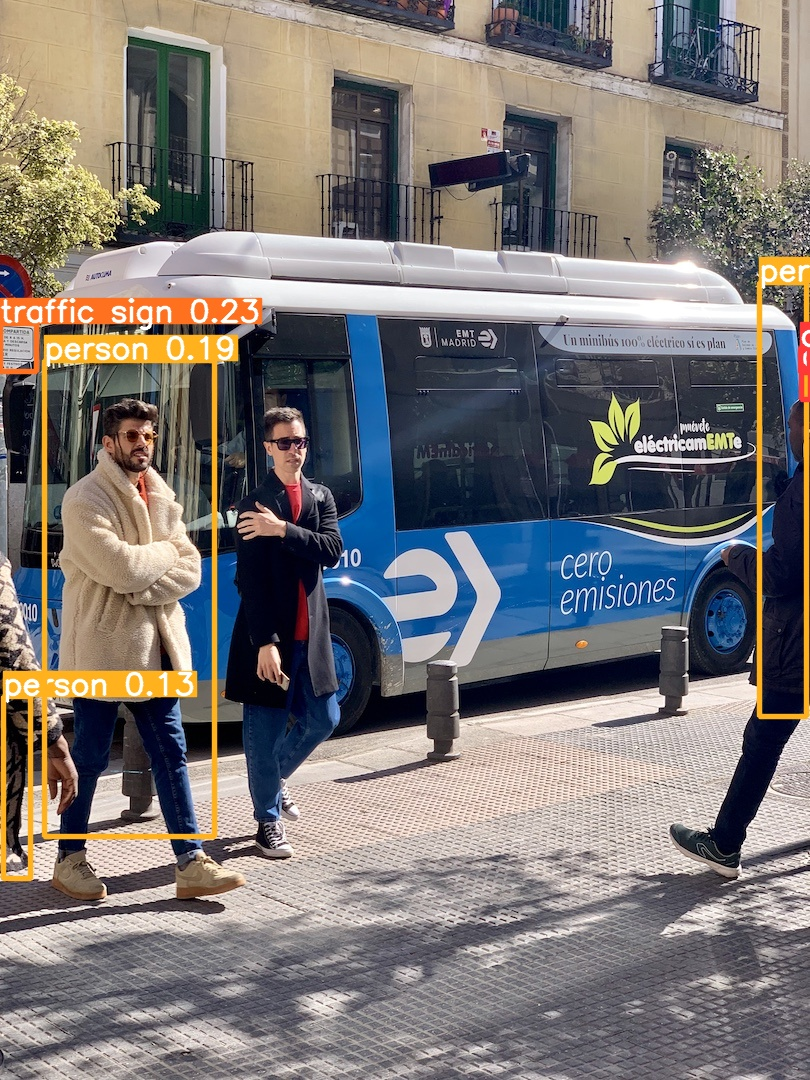

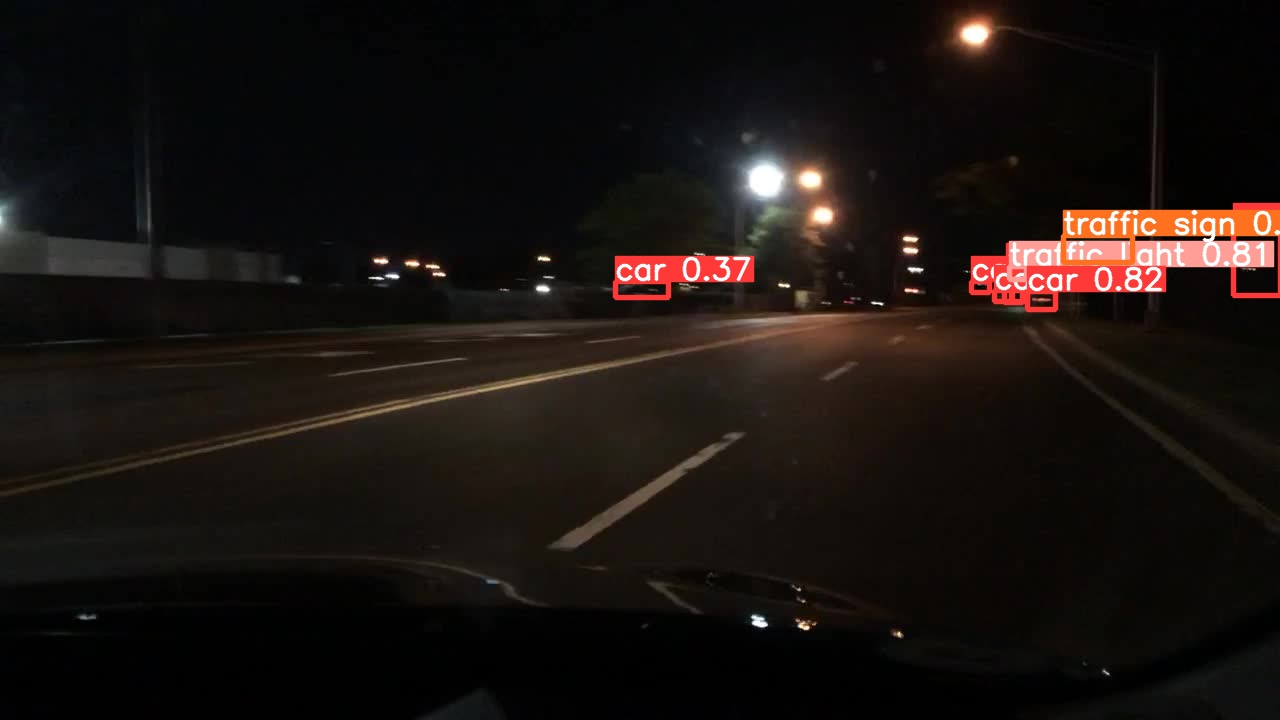

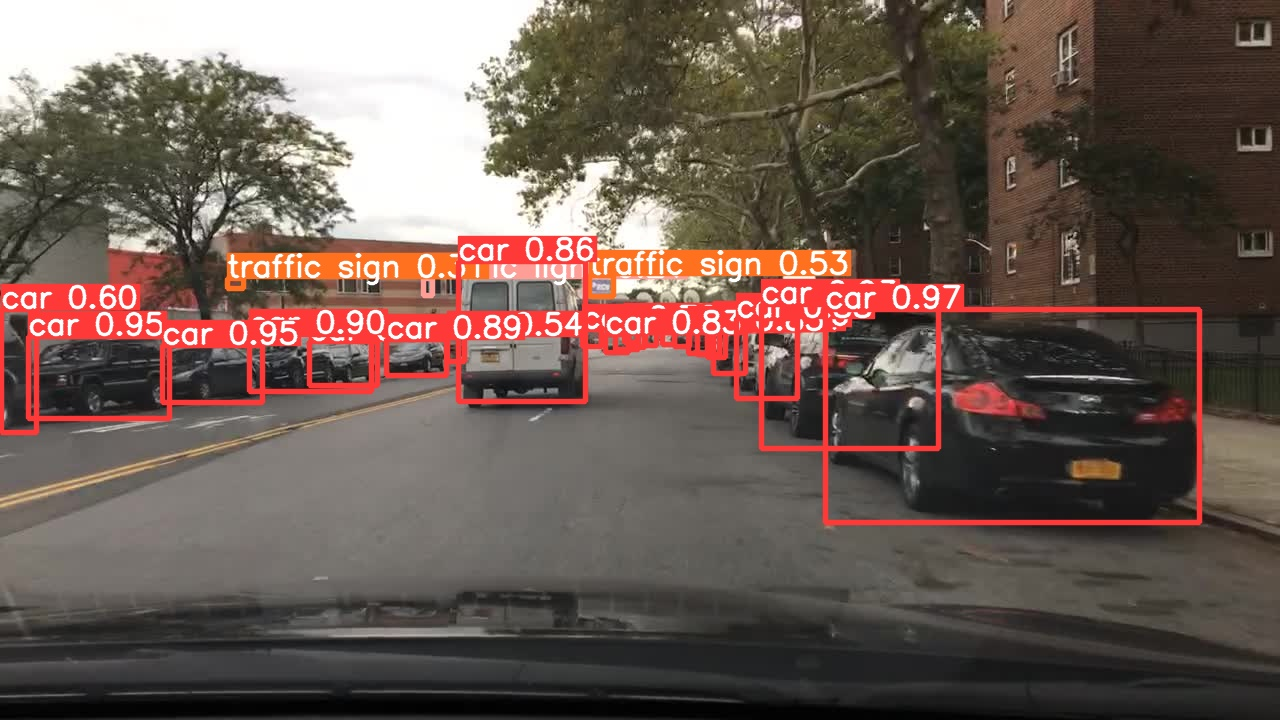

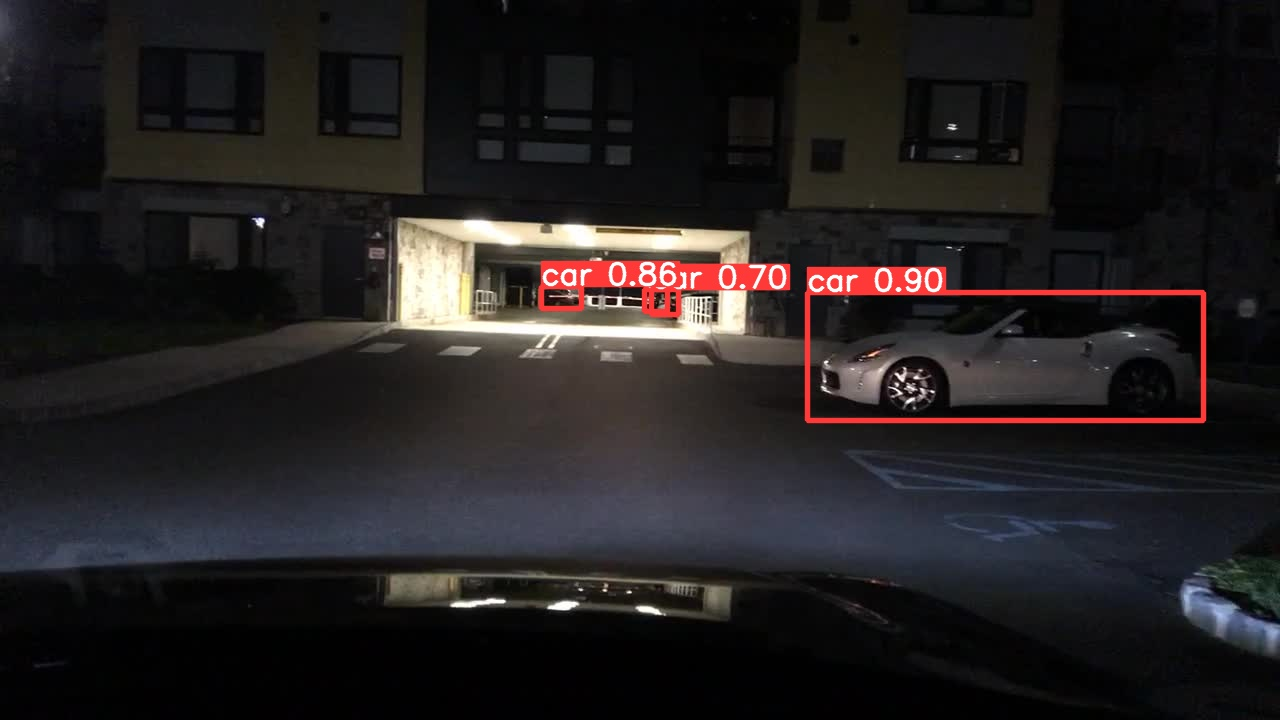

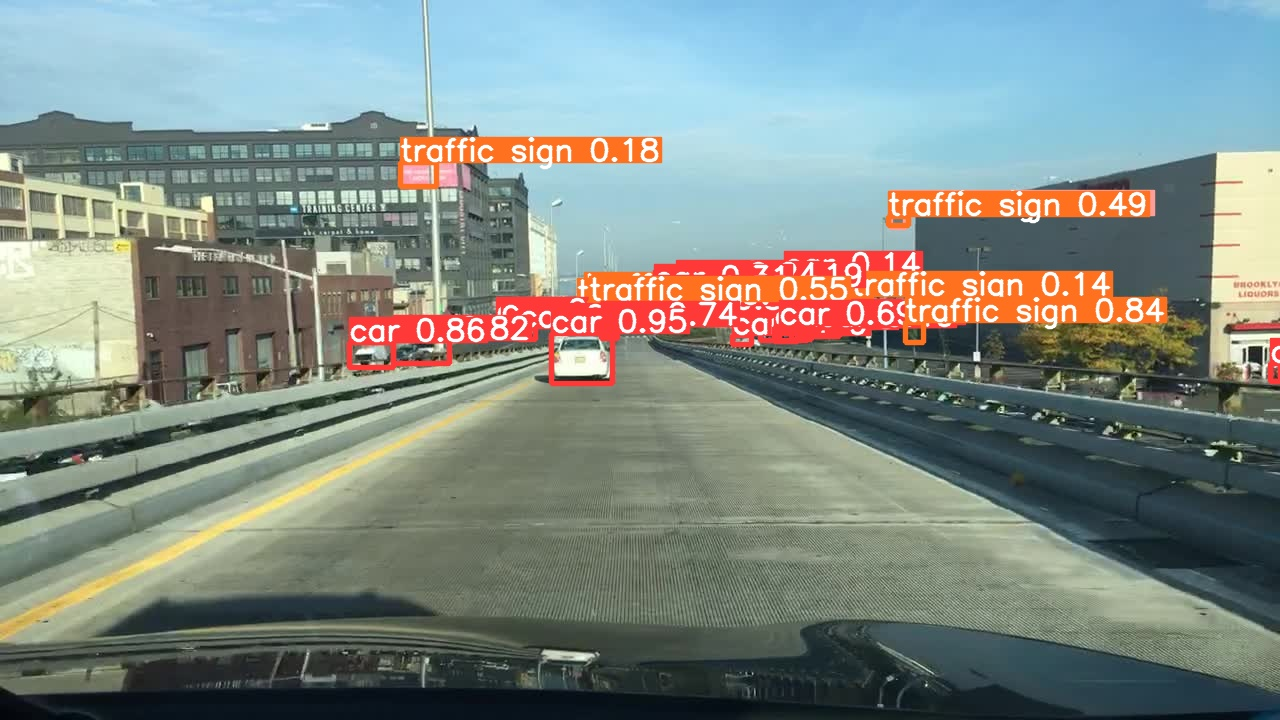

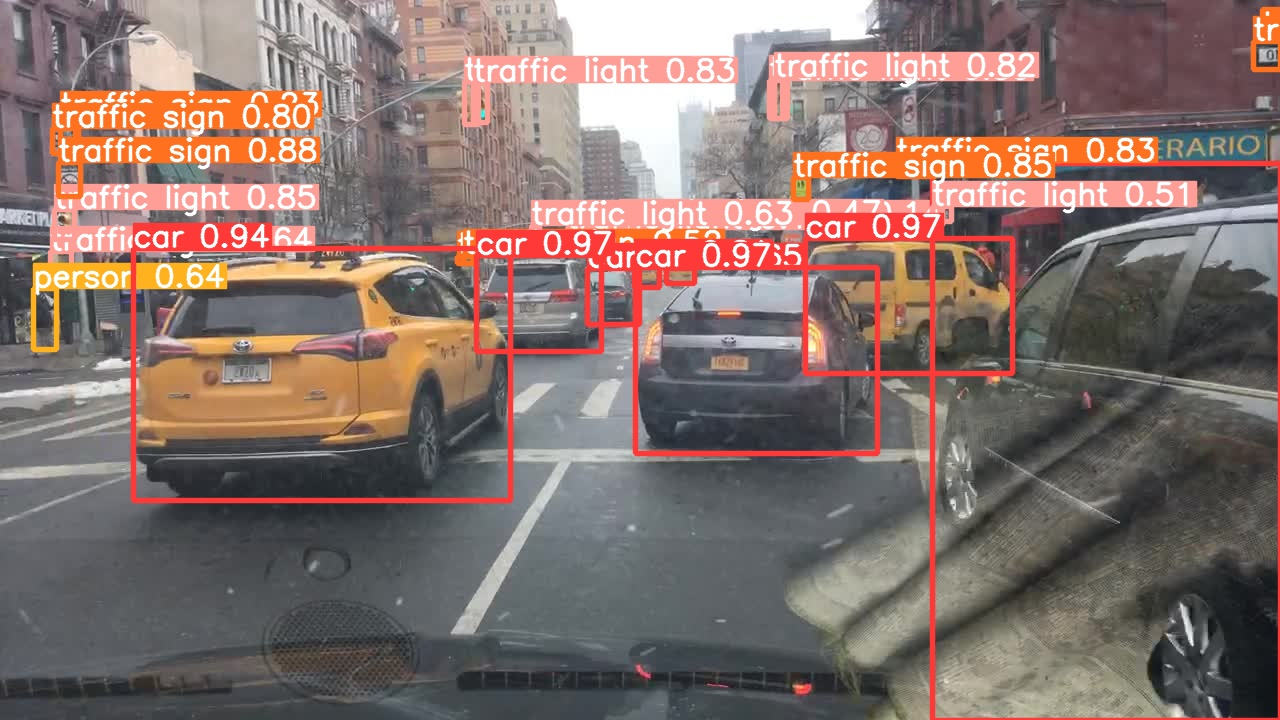

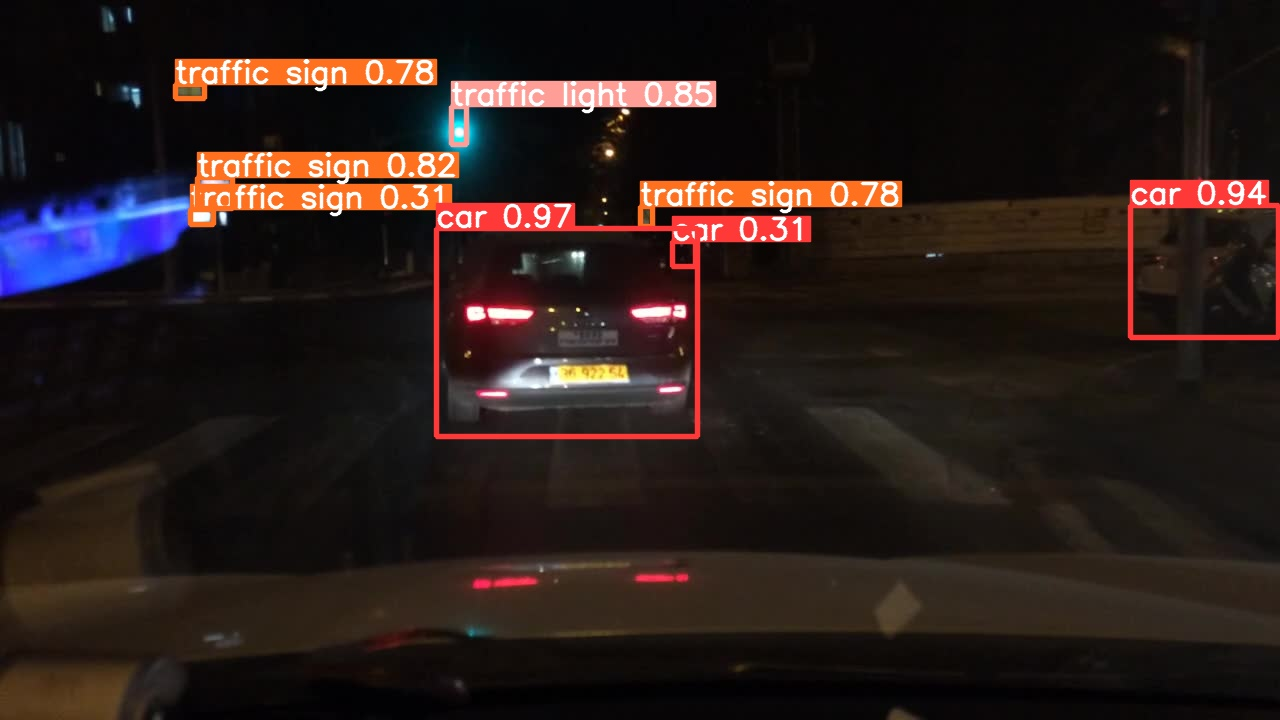

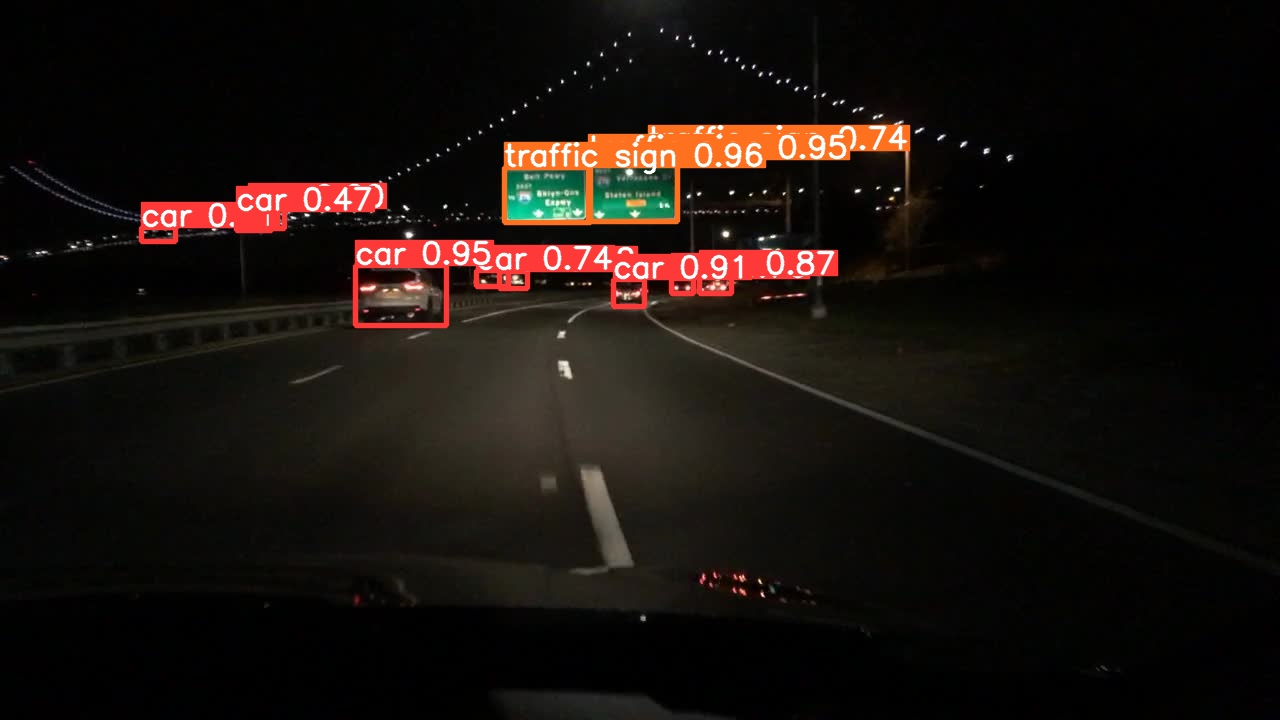

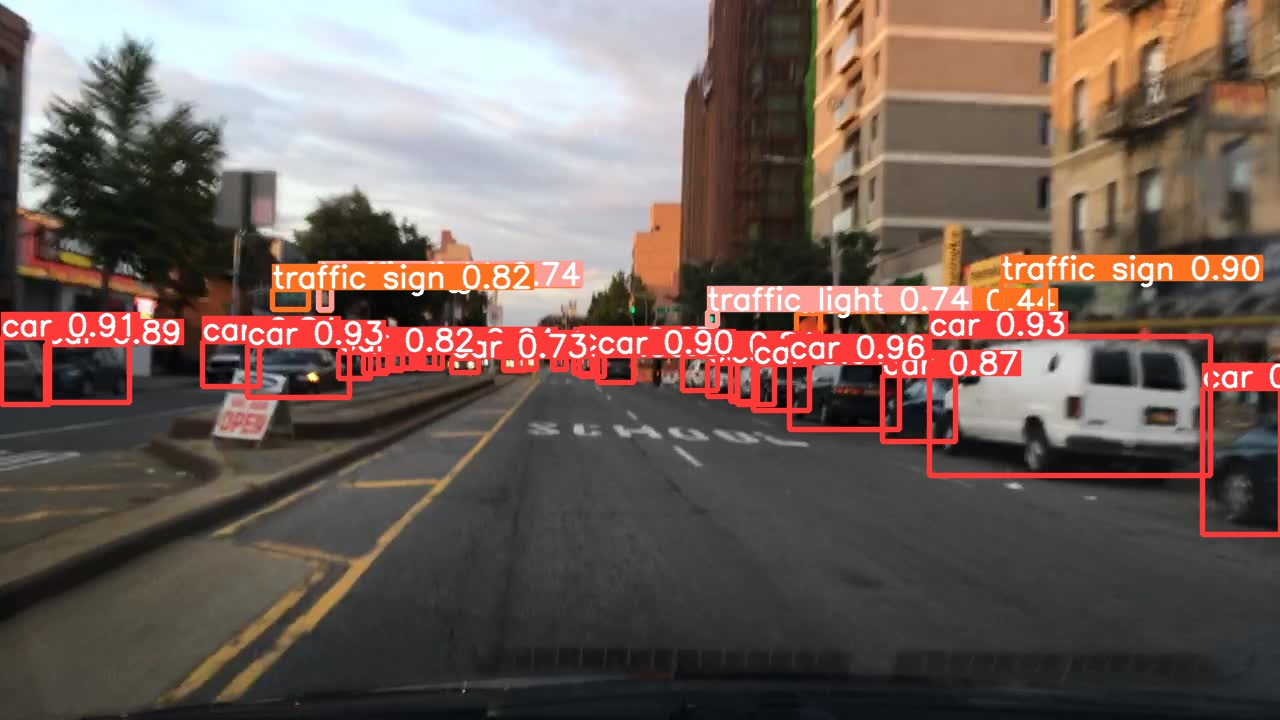

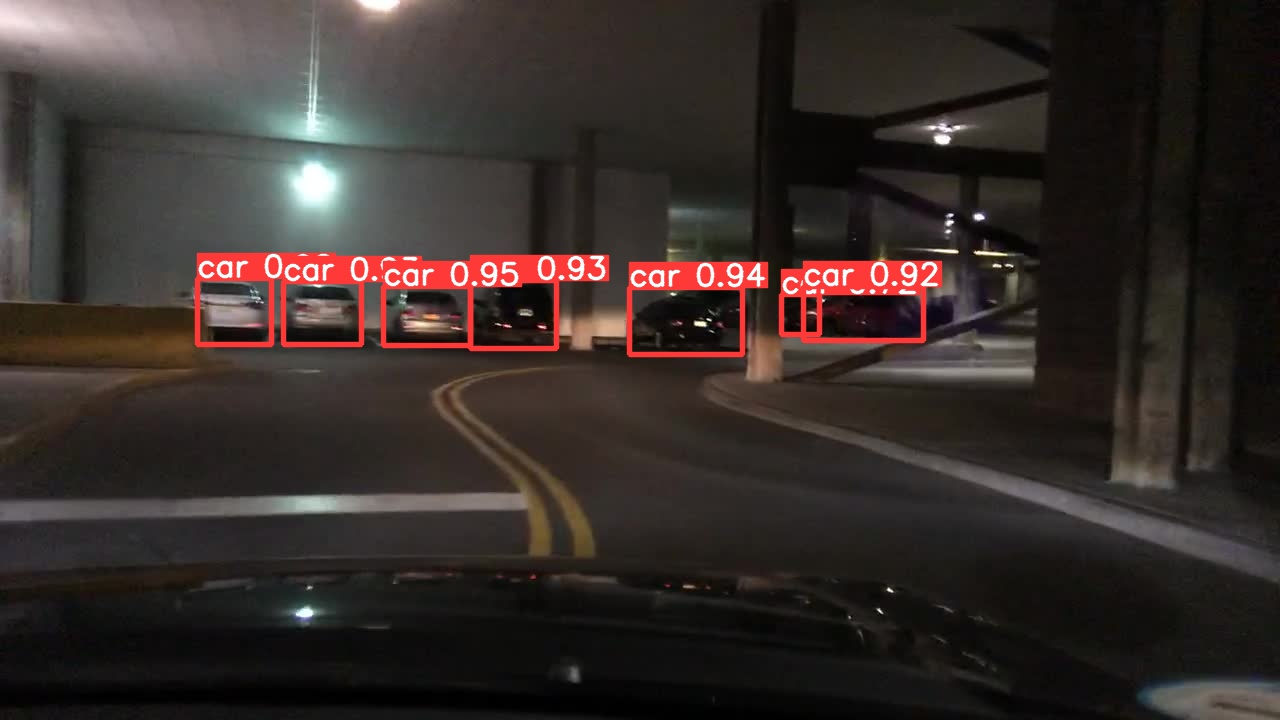

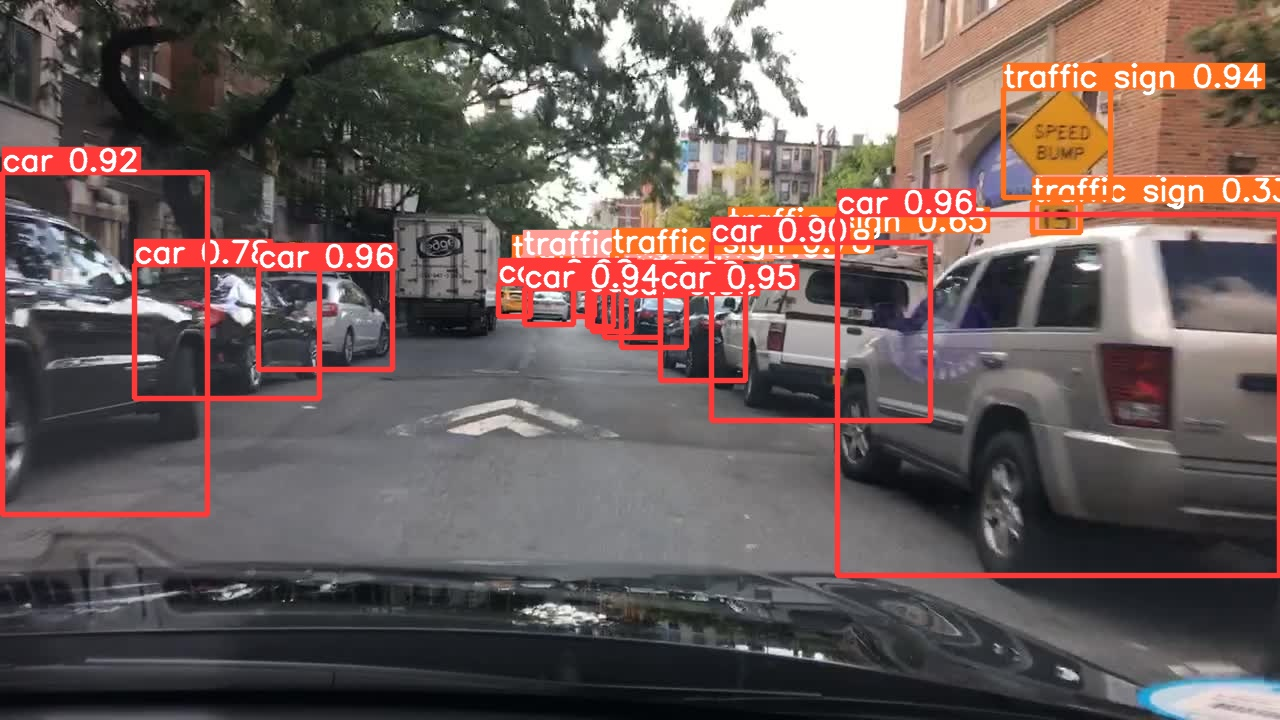

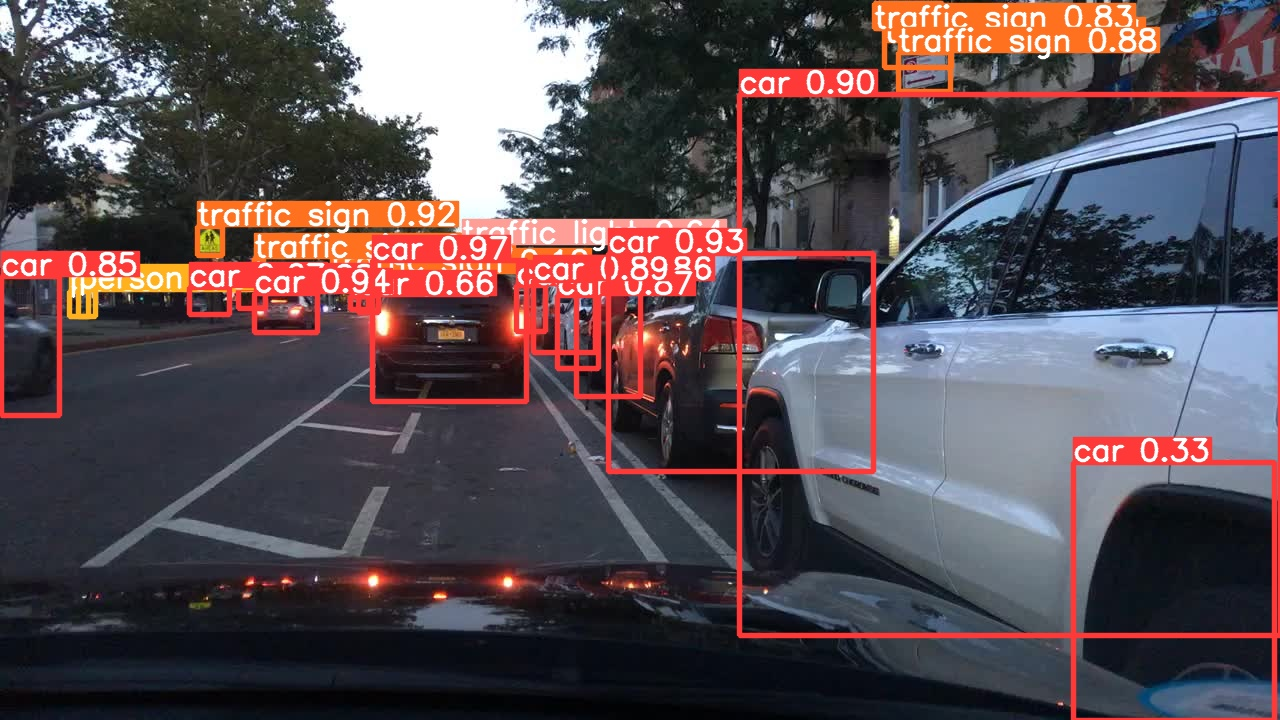

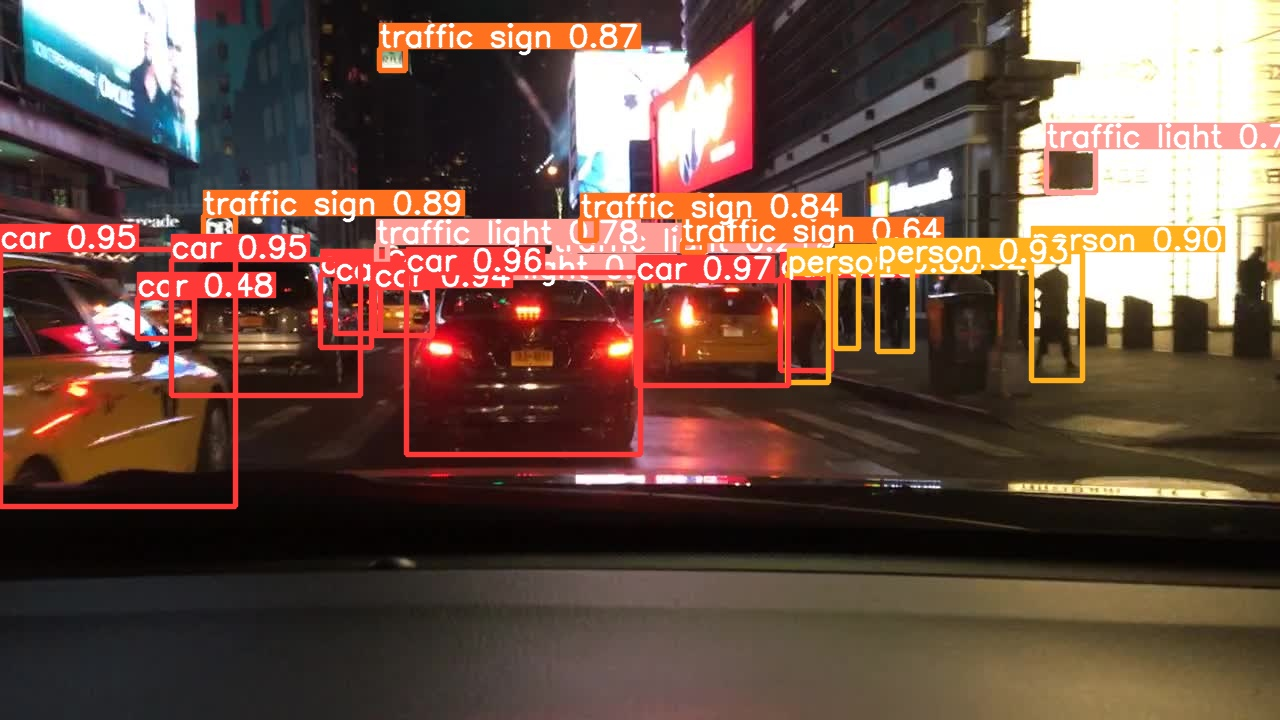

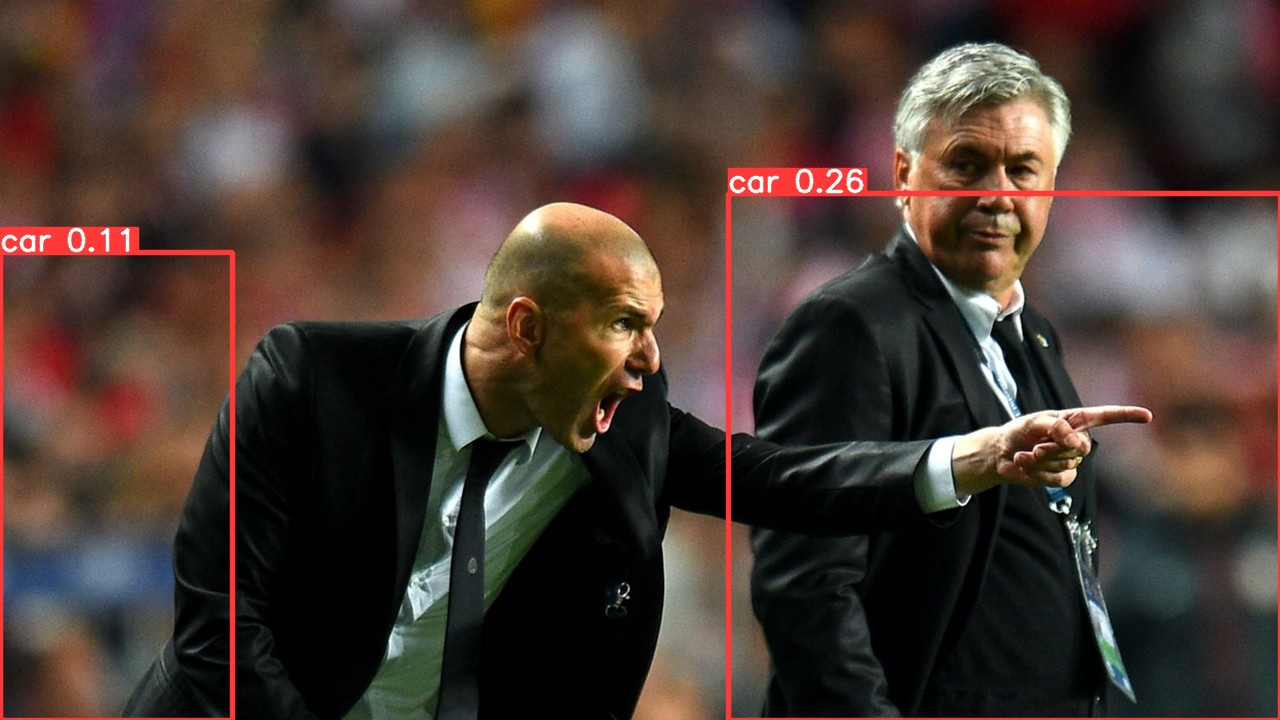

In [21]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp3/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# export best.pt file to saved_model format

!python /home/munirj/code/munirj/yolov5/export.py --weights runs/train/exp8/weights/best.pt --include saved_model

export: data=data/coco128.yaml, weights=['runs/train/exp8/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['saved_model']
YOLOv5 🚀 v6.1-10-gc2403eb torch 1.10.2+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp8/weights/best.pt with output shape (1, 25200, 11) (14.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.7.0...

                 from  n    params  module                                  arguments                     
2022-03-03 19:14:39.859472: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-03 19:14:39.859688: I tensorflow/strea

2022-03-03 19:14:42.019970: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-03-03 19:14:42.020651: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-03-03 19:14:42.041471: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1149] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.523ms.
  function_optimizer: function_optimizer did nothing. time = 0.004ms.

Assets written to: runs/train/exp8/weights/best_saved_model/assets
TensorFlow SavedModel: export success, saved as runs/train/exp8/weights/best_saved_model (28.4 MB)

Export complete (6.07s)
Results saved to /home/munirj/code/munirj/yolov5/runs/train/exp8/weights
Detect:          python detect.py --weights runs/train/exp8/weights/best_saved_model
PyTorch Hub:     model = torch.hub.load('ultralytics/yolov5', 'custom', 'runs/train/exp8/weights/best_saved_mode